#**AIIE 2025 Python Review**
  **Dr. Christelle Scharff | Dr. Kaleema**
  
 **Binary Classification - Cat/Dog Classification**

**Convolutional Neural Networks (CNNs) Overview:**

    CNNs are a class of deep learning models primarily used for image recognition
    and computer vision tasks.

    CNNs automatically learn features from images by using a combination
    of convolutional layers, pooling layers, and fully connected layers.

    In this particular CNN model for classifying images of dogs and cats,
    the architecture typically consists of the following layers:

**Convolutional Layers:**

    The core building blocks of CNNs, where a filter (kernel) is applied to an image
    to detect local patterns such as edges, corners, and textures.

    In this case, each convolutional layer applies a series of filters to detect
    different features of the image (e.g., edges, textures).

    The first convolutional layer typically learns low-level features, while deeper
    layers learn higher-level, more abstract features.

**Max Pooling Layers:**

    Max pooling reduces the dimensionality of the feature maps while retaining important information.
    It selects the maximum value from a set of pixels in the feature map.

    Pooling helps reduce computation and prevents overfitting.

**Flatten Layer:**

    After several convolutional and pooling layers, the feature maps need to
    be flattened (converted into a 1D vector) to feed into the fully connected layers.

    The Flatten() layer reshapes the 3D data into a 1D array.

**Fully Connected Layers (Dense Layers):**

    These are traditional neural network layers that connect all the neurons from
    the previous layer to each neuron in the current layer.

    In the final layer, there is typically one neuron for each class (dog or cat in this case)
    with a softmax activation function to predict the class.

    **Sigmoid Activation**: For binary classification (cat vs. dog), the sigmoid
    function outputs values between 0 and 1. We classify the image as "dog" if the output is closer to 1, and "cat" if it’s closer to 0.
    

**Dropout (Optional but Recommended):**

    Dropout is a technique used during training to randomly drop some neurons
    from the network, preventing overfitting by forcing the network to generalize better.



##### **Importing Cat_Dog_Dataset from Kaggle**

    Ensure you have kagglehub installed. If not, install it using
      pip install kagglehub


    Import necessary libraries for importing data from Kaggle

In [ ]:
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
# Define local save path
local_path = "./CatDog_dataset/"

# Ensure the local directory exists
os.makedirs(local_path, exist_ok=True)
# Copy the dataset to the local directory
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(local_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

print(f"Dataset saved at: {local_path}")

print(f"Dataset saved at: {local_path}")

Dataset saved at: ./CatDog_dataset/
Dataset saved at: ./CatDog_dataset/


    Now, extract the dataset into a specified directory

##### **Import Required Libraries for CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


##### **Define Paths and Load Dataset**

In [ ]:
# Correcting paths
train_dir = "/content/CatDog_dataset/training_set/training_set"
test_dir = "/content/CatDog_dataset/test_set/test_set"

# Define ImageDataGenerator for augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


##### **Create a Simple CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Cat vs Dog)
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### **Train the Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 65s 238ms/step - accuracy: 0.5174 - loss: 0.7806 - val_accuracy: 0.5235 - val_loss: 0.6808
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.5952 - loss: 0.6626 - val_accuracy: 0.6569 - val_loss: 0.6242
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.6269 - loss: 0.6396 - val_accuracy: 0.6881 - val_loss: 0.6090
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 241ms/step - accuracy: 0.6533 - loss: 0.6159 - val_accuracy: 0.6975 - val_loss: 0.5874
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - accuracy: 0.6860 - loss: 0.5871 - val_accuracy: 0.6683 - val_loss: 0.6292
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 229ms/step - accuracy: 0.7029 - loss: 0.5646 - val_accuracy: 0.7578 - val_loss: 0.5062
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.7312 - loss: 0.5300 - val_accuracy: 0.7696 - val_loss: 0.4799
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - accuracy: 0.7355 - loss: 0

##### **Evaluate & Test the Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7700 - loss: 0.4852
Test Accuracy: 0.78


##### **Predict on a New Image**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


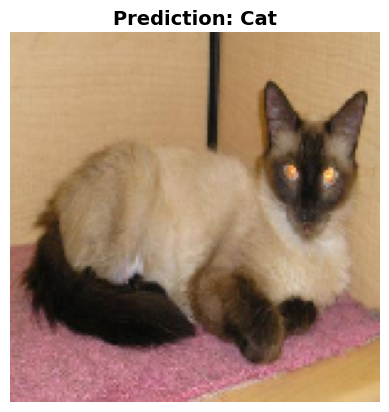

None


In [ ]:
# Example usage
img_path = "/content/CatDog_dataset/test_set/test_set/cats/cat.4019.jpg"
print(predict_image(img_path))